In [ ]:
#Nama: Dilara Kynta Putri
#NIM: 1103204059
#Kelas: TK44GAB4

#import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from ipywidgets import interact, IntSlider
from google.colab import drive

In [ ]:
# Menggunakan code ini, kita dapat me-mount Google Drive ke dalam lingkungan Colab atau Jupyter Notebook.
# Ini memungkinkan akses langsung ke file dan folder di Google Drive dalam sesi notebook.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/drive/MyDrive/Customers.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari dataframe
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Tampilkan jumlah nilai unik untuk setiap fitur
print(df.nunique(axis=0))


CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
#Melihat Keberadaan Data 'null' (missing value) pada Dataset
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
#Melihat Deskripsi Dataset
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
# Mengubah Nama Atribut 'Work Experience' Menjadi 'Work_Experience'
df.rename(columns={'Work Experience': 'Work_Experience'}, inplace=True)
df.rename(columns={'Annual Income': 'annual_income'}, inplace=True)
df.rename(columns={'Spending Score': 'spending_score'}, inplace=True)
df.rename(columns={'Work Experience': 'Work_Experience'}, inplace=True)
df.rename(columns={'Family Size': 'Family_Size'}, inplace=True)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
Age_zero_count = (df['Age'] == 0).sum()
Work_Experience_zero_count = (df['Work_Experience'] == 0).sum()

print("Jumlah nilai 0 di kolom Age: ", Age_zero_count)
print("Jumlah nilai 0 di kolom Work_Experience: ", Work_Experience_zero_count)

Jumlah nilai 0 di kolom Age:  24
Jumlah nilai 0 di kolom Work_Experience:  431


In [ ]:
df.shape

(2000, 8)

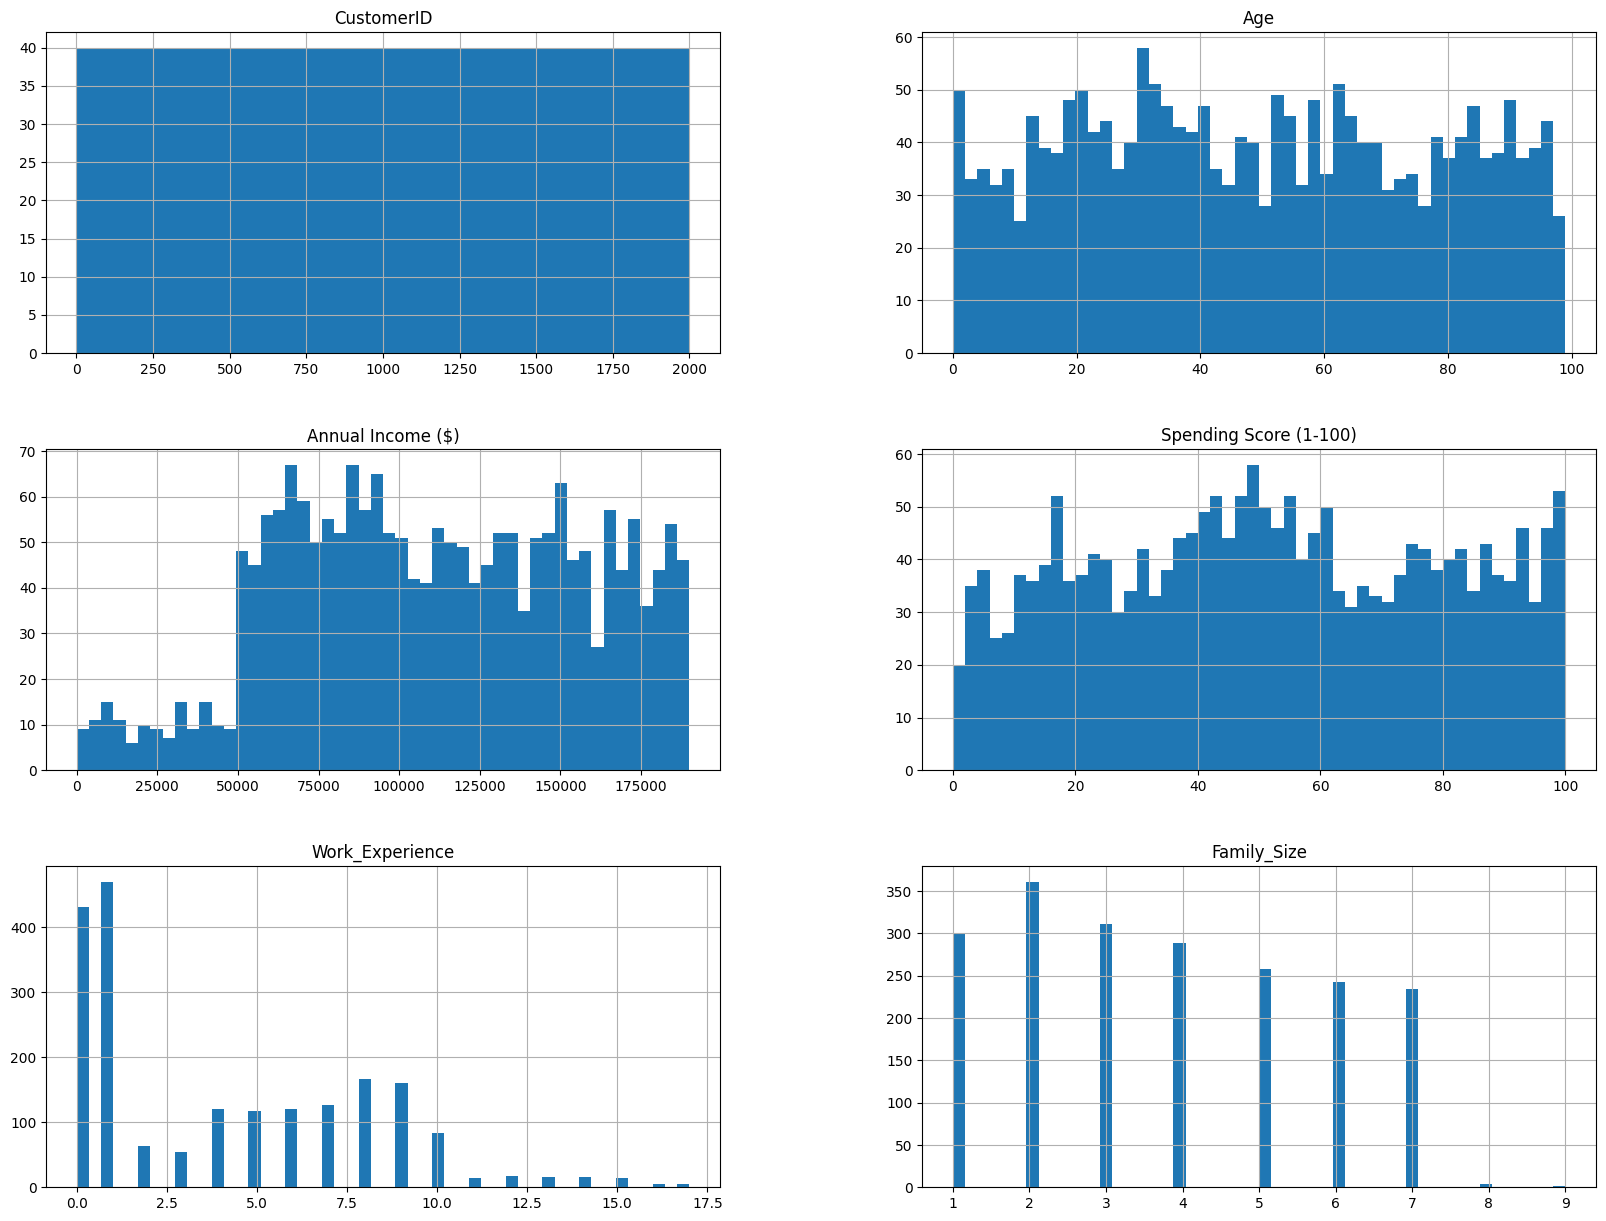

In [ ]:
#Analisis Fitur Numerik dengan data fitur tunggal
df.hist(bins=50, figsize=(20,15))
plt.show()

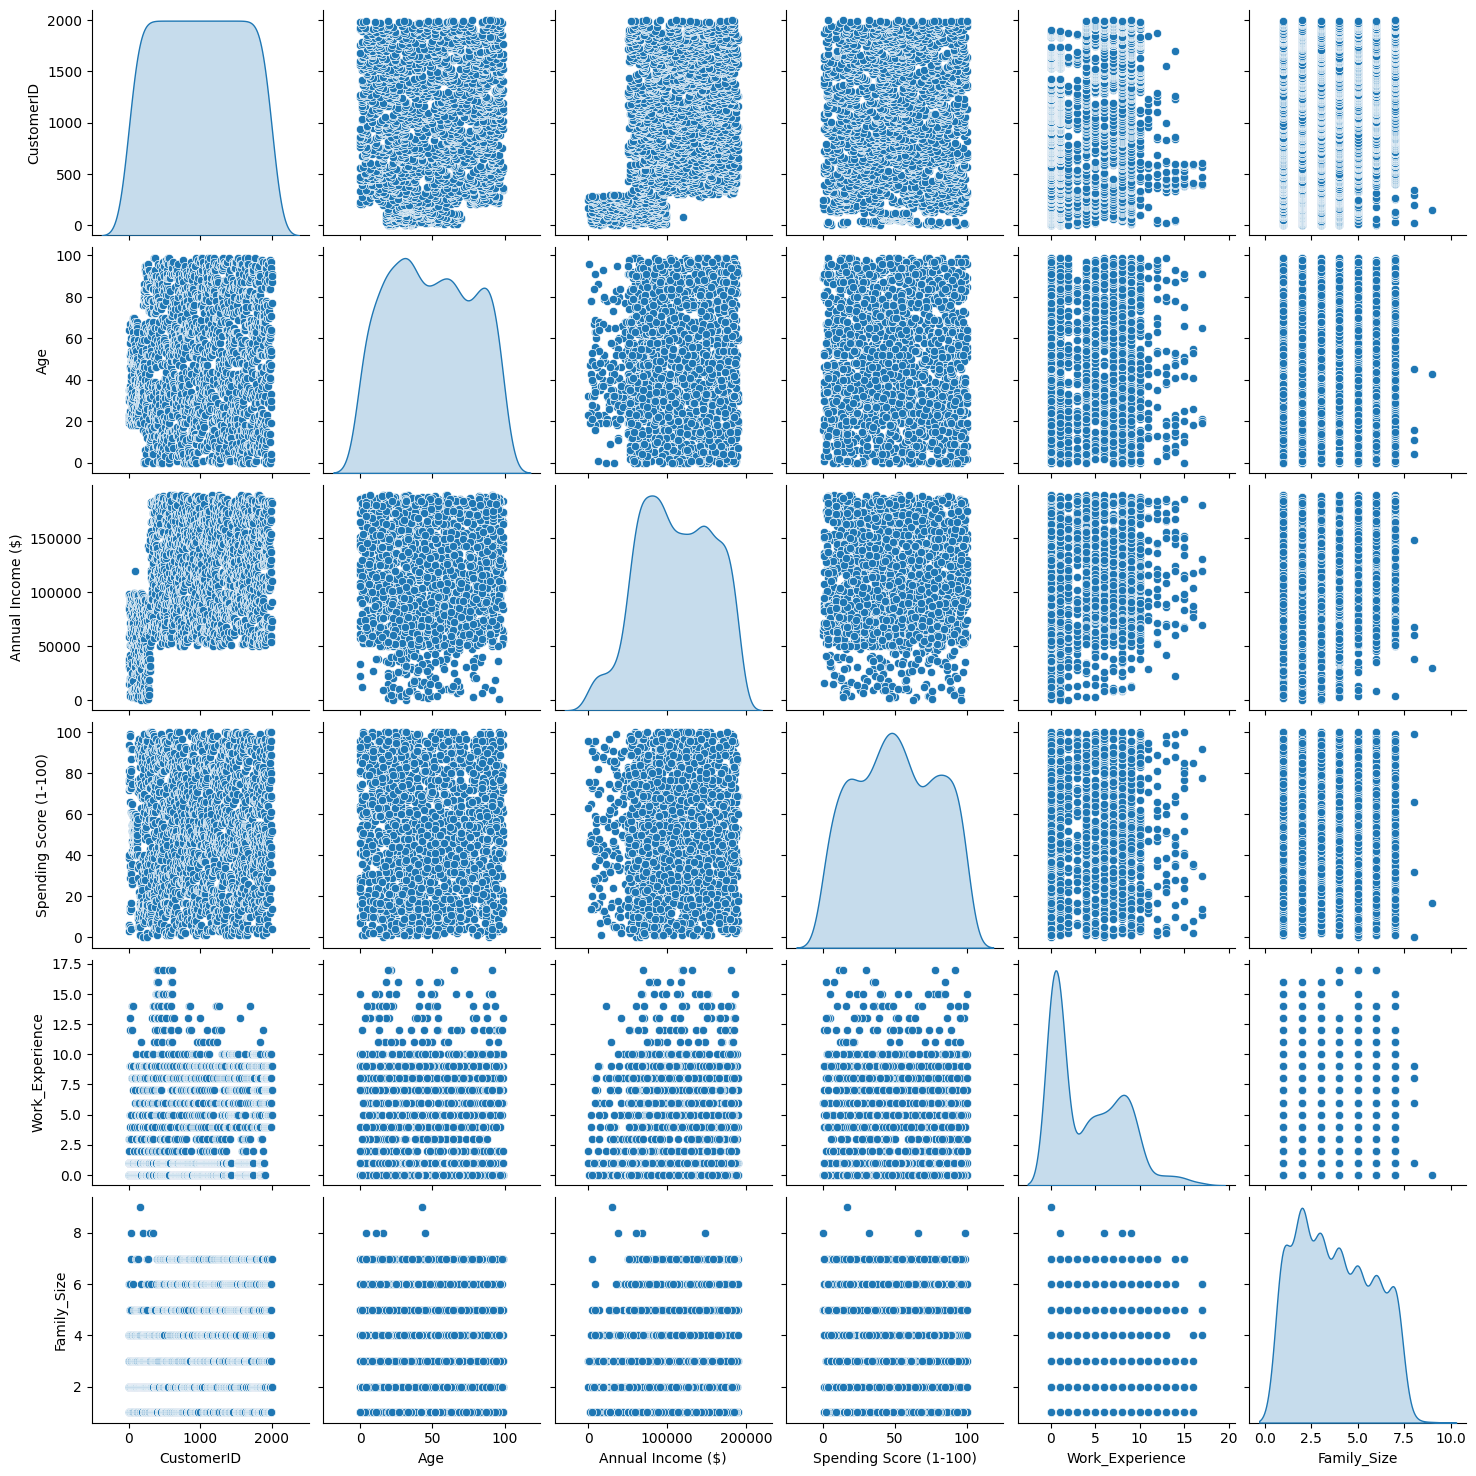

In [ ]:
#Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-17-15665966c9df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

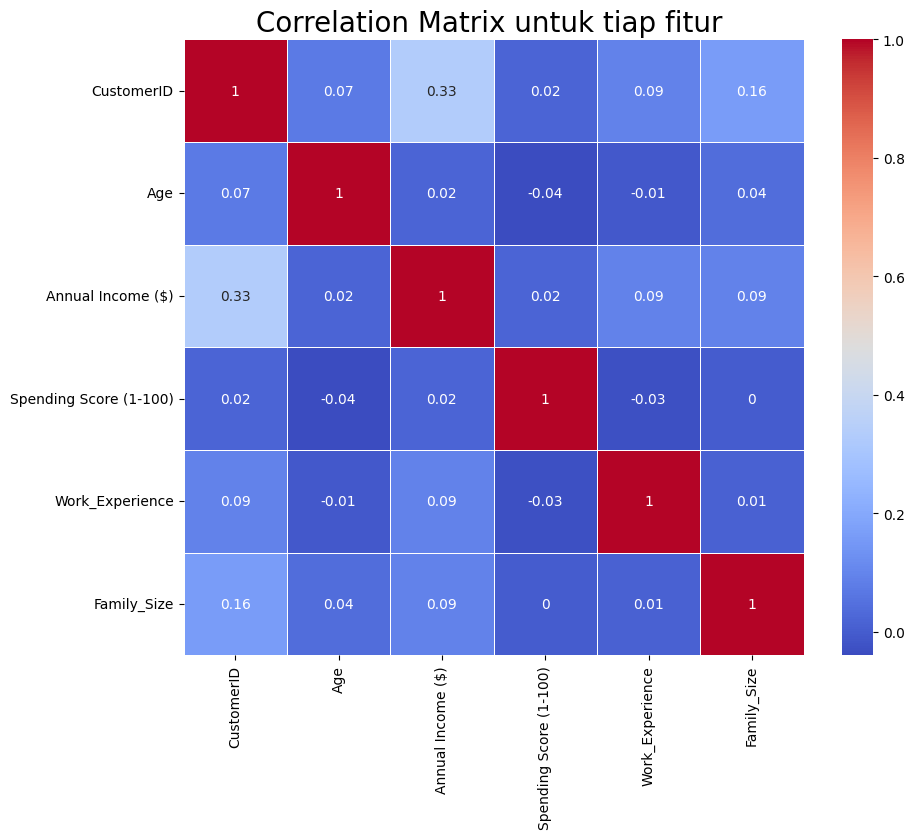

In [ ]:
#Evaluasai Skor Korelasi dengan Fungsi 'corr()'
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [ ]:
#Inisialisasi atribut dan target
X = df['Work_Experience']
y = df['Age']

In [ ]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [ ]:
#Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 2000
Total # sampel di seluruh dataset: 1800
Total # sampel di seluruh datasett: 200


In [ ]:
# Standarisasi Data Latih
numerical_features = ['Work_Experience']
scaler = StandardScaler()
scaler.fit(X[numerical_features])
X[numerical_features] = scaler.transform(X[numerical_features])
X.head()

KeyError: ignored